# Практика

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
import math
%matplotlib inline

In [78]:
#!pip install scipy
#!pip install statsmodels

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [11]:
# ваш код тут
# возьмем распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genlogistic.html#scipy.stats.genlogistic

sample = sts.genlogistic.rvs(c=0.4, size=100)
sample

array([ -2.11818985,  -0.25043084,  -0.11049565,  -0.8885999 ,
         1.85920056,   0.03323788,  -4.36167177,  -2.39799646,
         0.55351825,  -1.06710551,  -1.8055609 ,  -2.45554531,
        -1.26848018,   1.73447138,   1.61179368,  -3.16797747,
         1.67773388,  -3.849128  ,  -0.2168981 , -10.12162641,
        -1.79450251,   0.76059135,  -5.07918072,  -1.18849546,
        -4.77832868,  -2.82223673,  -1.9745393 ,  -1.5296882 ,
        -0.3487575 ,  -0.36940001,  -1.8108731 ,  -3.90301352,
        -1.38526622,  -9.04644131,  -1.60004757,  -0.23029863,
        -1.65730921,  -7.64102643,  -0.49065527,  -1.65326054,
        -6.71754134,  -2.07275395,  -2.16009458,  -0.97812829,
         1.32187385,  -0.74471225,  -5.2493496 ,   0.11996556,
        -4.01346207,  -2.68324201,  -1.44042832,  -7.61590811,
         0.35652672,   2.04818774,   0.71637372,  -6.7035501 ,
         2.35405508, -12.9397483 ,  -2.37249329,  -5.48919594,
        -1.24638761,  -0.25134289,  -6.35283971,   0.03

In [12]:
sample.dtype

dtype('float64')

In [43]:
mean = sts.genlogistic.mean(c=0.4)
var = sts.genlogistic.var(c=0.4)
std = sts.genlogistic.std(c=0.4)
print(f'Настоящее среднее случайной величины: {mean} \nНастоящая дисперсия случайной величины: {var} \nНастоящее стандартное отклонение случайной величины: {std}')

Настоящее среднее случайной величины: -1.9841688796835837 
Настоящая дисперсия случайной величины: 8.920290657377823 
Настоящее стандартное отклонение случайной величины: 2.9866855638613554


### Постройте гистограмму выборки и теоретическую плотность распределения

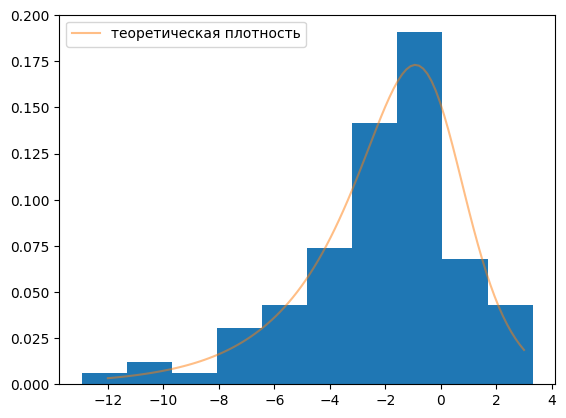

In [24]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-12,3,100)
pdf = sts.genlogistic.pdf(x, c=0.4)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [25]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-2.1626758919439224
8.730302842178652


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

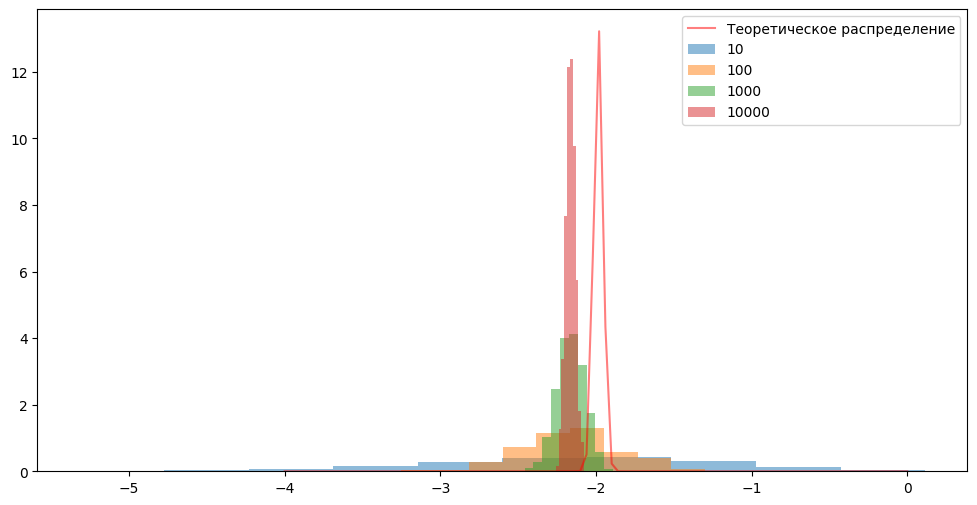

In [48]:
plt.figure(figsize=(12,6))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(np.random.choice(sample,N)))
    plt.hist(means, alpha=0.5, density=True)

norm_rv = sts.norm(loc=mean, scale=std / np.sqrt(N))
x = np.linspace(-4,0, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5, color='red')

plt.legend(['Теоретическое распределение', '10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Плохо, пересечение очень мало

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [51]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [71]:
df_churn_false = df[df['churn'] == False].reset_index()
df_churn_true = df[df['churn'] == True].reset_index()

In [87]:
int_false = sts.norm.interval(confidence=0.95, loc=np.mean(df_churn_true['total day calls']), 
                      scale= np.std(df_churn_true['total day calls'], ddof=1)/ np.sqrt(len(df_churn_true)))
str_array_1 = [f"{x:.2f}" for x in int_false]
print(f"Доверительный интервал для среднего total day calls с churn = True:[{', '.join(str_array_1)}]")

int_true = sts.norm.interval(confidence=0.95, loc=np.mean(df_churn_false['total day calls']), 
                      scale= np.std(df_churn_false['total day calls'], ddof=1)/ np.sqrt(len(df_churn_false)))
str_array_2 = [f"{x:.2f}" for x in int_true]
print(f"Доверительный интервал для среднего total day calls с churn = False:[{', '.join(str_array_2)}]")

Доверительный интервал для среднего total day calls с churn = True:[99.41, 103.26]
Доверительный интервал для среднего total day calls с churn = False:[99.56, 101.01]


In [88]:
zconfint_true = ssw._zconfint_generic(np.mean(df_churn_true['total day calls']), std_mean=np.std(df_churn_true['total day calls'], ddof=1)/np.sqrt(len(df_churn_true)), alpha=0.05, alternative='2s')
str_array_11 = [f"{x:.2f}" for x in zconfint_true]
print(f"Доверительный интервал для среднего total day calls с churn = True:[{', '.join(str_array_11)}]")

zconfint_false = ssw._zconfint_generic(np.mean(df_churn_false['total day calls']), std_mean=np.std(df_churn_false['total day calls'], ddof=1)/np.sqrt(len(df_churn_false)), alpha=0.05, alternative='2s')
str_array_22 = [f"{x:.2f}" for x in zconfint_false]
print(f"Доверительный интервал для среднего total day calls с churn = False:[{', '.join(str_array_22)}]")

Доверительный интервал для среднего total day calls с churn = True:[99.41, 103.26]
Доверительный интервал для среднего total day calls с churn = False:[99.56, 101.01]


Двумя методами результаты одинаковы: доверительные интервалы сильно пересекаются. Вероятнее всего churn не зависит от параметра total day calls